# Artificial Neural Network on mnist dataset

##### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing dataset

In [3]:
digits = pd.read_csv("mnist.csv")

In [4]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
digits=digits.astype(np.uint8)

In [6]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
digits_features=digits.drop('label',axis=1)

In [8]:
labels=digits['label']

## Data Visualization

C:\Users\prathibha k s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

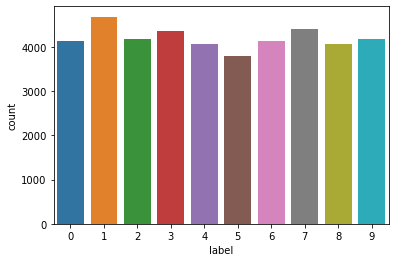

In [9]:
sns.countplot(digits['label'])

Text(0.5, 1.0, '1')

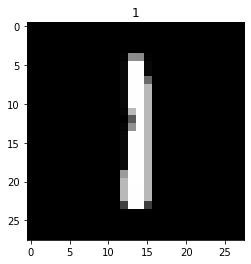

In [10]:
plt.imshow(digits_features.iloc[2,:].values.reshape(28,28),cmap='gray')
plt.title(labels[2])

#### Model Building

In [11]:
import sklearn.neural_network as nn
import sklearn.model_selection as ms
import sklearn.metrics as mt

In [12]:
Norm_digits_features=digits_features/255

#### Train test split

In [14]:
x_train,x_test,y_train,y_test=ms.train_test_split(Norm_digits_features,labels,test_size=0.3,random_state=2123245)

In [15]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((29400, 784), (12600, 784), (29400,), (12600,))

#### Model

In [16]:
ANN=nn.MLPClassifier(solver='lbfgs',alpha=0.02,hidden_layer_sizes=(20,20,10),max_iter=800)

In [17]:
%%time
ANN.fit(x_train,y_train)

Wall time: 3min 24s


C:\Users\prathibha k s\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.02, hidden_layer_sizes=(20, 20, 10), max_iter=800,
              solver='lbfgs')

#### Model Performance

In [18]:
ANN.score(x_train,y_train)

0.9998299319727891

In [19]:
ANN.score(x_test,y_test)

0.9183333333333333

#### Model Evaluation

<AxesSubplot:>

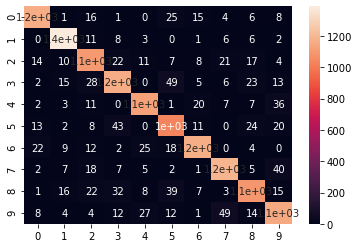

In [20]:
sns.heatmap(mt.confusion_matrix(y_test,ANN.predict(x_test)),annot=True)

In [21]:
print(mt.classification_report(y_test,ANN.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1239
           1       0.95      0.97      0.96      1427
           2       0.89      0.91      0.90      1214
           3       0.90      0.89      0.90      1303
           4       0.93      0.93      0.93      1212
           5       0.87      0.90      0.88      1155
           6       0.94      0.93      0.94      1261
           7       0.93      0.93      0.93      1277
           8       0.91      0.88      0.90      1235
           9       0.89      0.90      0.89      1277

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



#### Predicted Result

In [22]:
result=ANN.predict(x_test)

Text(0.5, 1.0, '9')

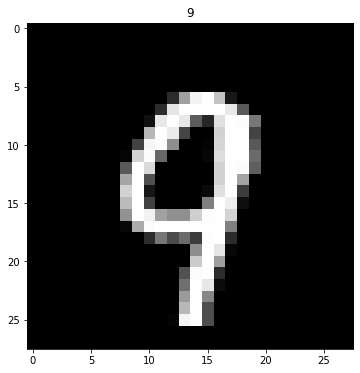

In [23]:
plt.figure(figsize=(6,6))
plt.imshow(x_test.iloc[3,:].values.reshape(28,28),cmap='gray')
plt.title(result[3])